# Project: Analyzing Historical Stock/Revenue Data and Building a Dashboard

## Extracting and Visualizing Stock and Revenue Data for Tesla and GameStop

In [41]:
!pip install yfinance
!pip install matplotlib
!pip instal bs4

ERROR: unknown command "instal" - maybe you meant "install"


In [54]:
#Import Libraries
import yfinance as yf
import pandas as pd
from bs4 import BeautifulSoup
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [64]:
#Defining graphs
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1 - Extracting Tesla Stock Data Using yfinance

In [82]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


##  Question 2: Use Webscraping to Extract Tesla Revenue Data

In [90]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
data  = requests.get(url).text
soup = BeautifulSoup(data, "html.parser")

tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
tables = soup.find_all('table')
for table in tables:
    if "Quarterly Revenue" in table.text:
        rows = table.find_all('tr')
        for row in rows[1:]:
            col = row.find_all('td')
            if col:
                date = col[0].text.strip()
                revenue = col[1].text.strip().replace(',', '').replace('$', '')
                tesla_revenue = pd.concat([tesla_revenue, 
                                           pd.DataFrame({"Date": [date], "Revenue": [revenue]})], 
                                          ignore_index=True)
        break
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)
print(tesla_revenue.tail(5))

Empty DataFrame
Columns: [Date, Revenue]
Index: []


## Question 3: Extracting GameStop Stock Data Using yfinance

In [83]:
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670625,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [91]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
data  = requests.get(url).text
soup = BeautifulSoup(data, "html.parser")
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
tables = soup.find_all('table')
for table in tables:
    if "Quarterly Revenue" in table.text:
        rows = table.find_all('tr')
        for row in rows[1:]:
            col = row.find_all('td')
            if col:
                date = col[0].text.strip()
                revenue = col[1].text.strip().replace(',', '').replace('$', '')
                gme_revenue = pd.concat([gme_revenue, 
                                               pd.DataFrame({"Date": [date], "Revenue": [revenue]})], 
                                              ignore_index=True)
        break
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float)
print(gme_revenue.tail(5))

Empty DataFrame
Columns: [Date, Revenue]
Index: []


## Question 5: Plot Tesla Stock Graph

/tmp/ipykernel_183/3756985551.py:4: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_183/3756985551.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



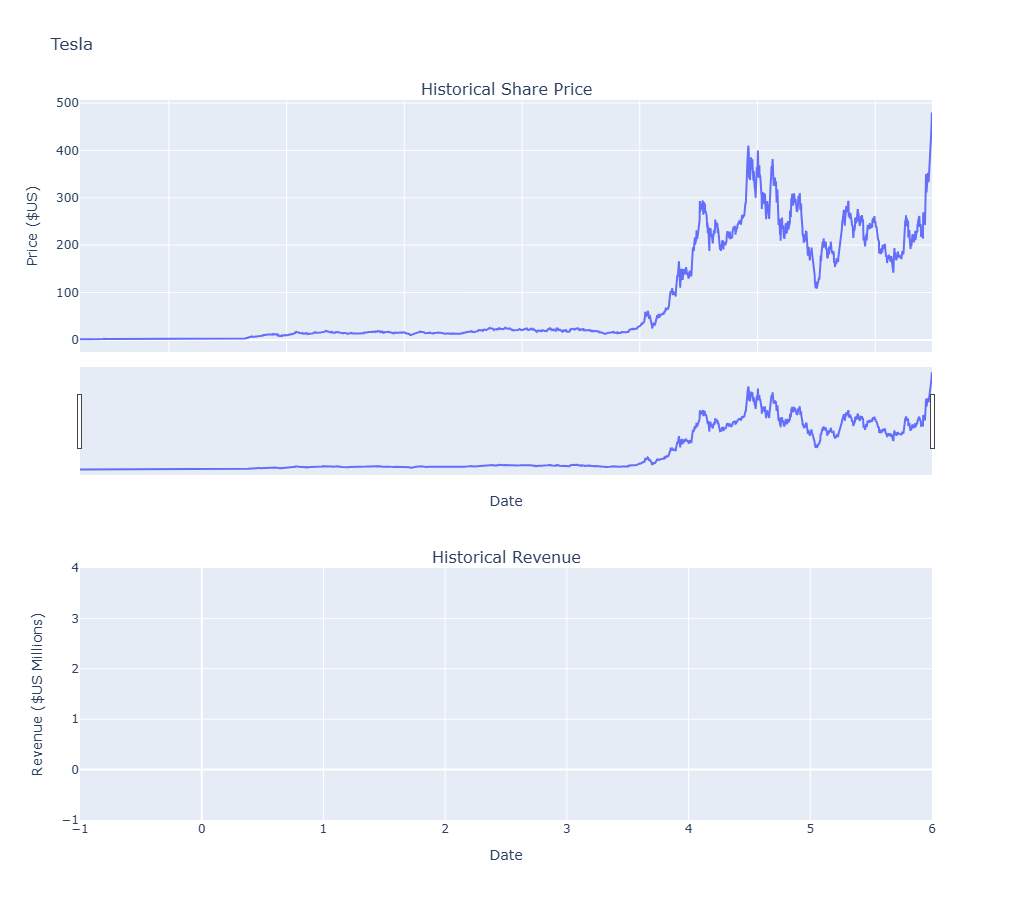

In [92]:
make_graph(tesla_data,tesla_revenue,'Tesla')

## Question 6: Plot GameStop Stock Graph

/tmp/ipykernel_183/3756985551.py:4: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_183/3756985551.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



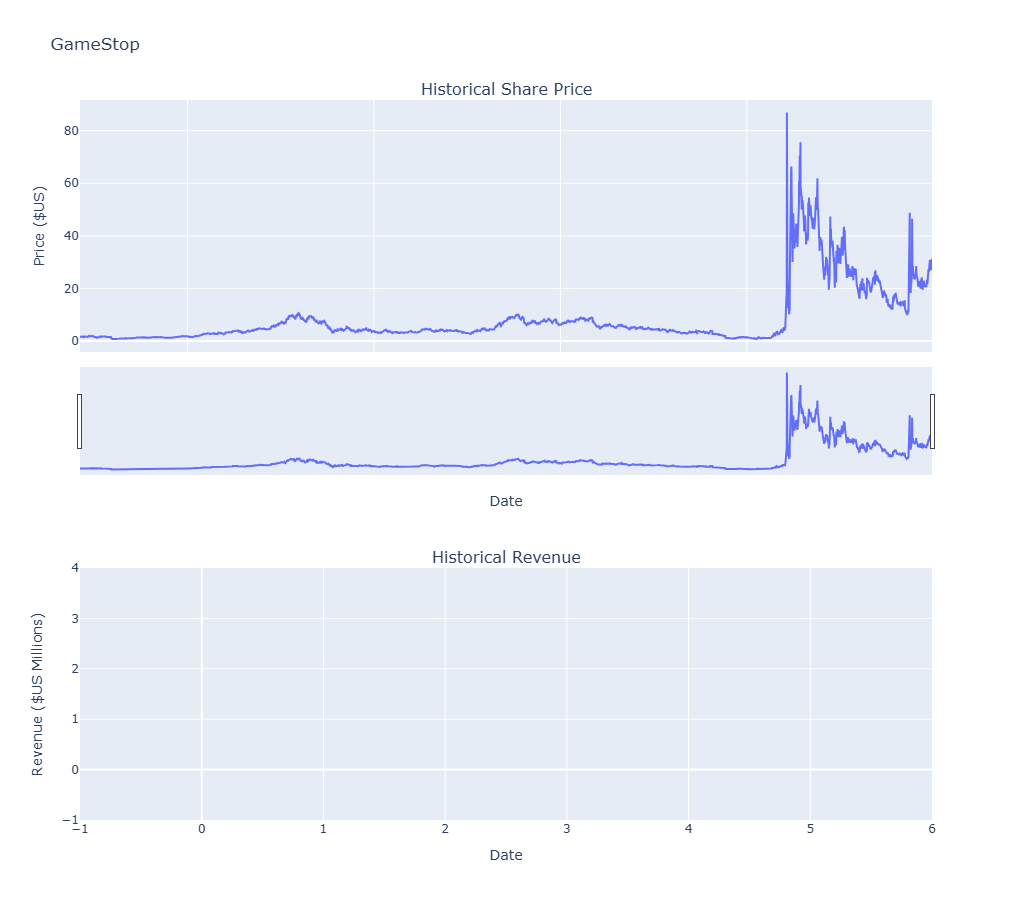

In [93]:
make_graph(gme_data,gme_revenue,'GameStop')